**1. Cargar Datos**

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sotastica/data/main/uso_internet_espana.csv')

In [4]:
# solo muestro 10 personas para ver qué tal
df.sample(10)

,uso_internet,sexo,edad,estudios
1796,1,Mujer,29,Medios universitarios
1234,1,Mujer,42,Secundaria
314,1,Mujer,35,Superiores
1280,0,Mujer,64,Sin estudios
1476,1,Mujer,39,F.P.
1561,0,Mujer,68,Sin estudios
800,0,Mujer,63,Primaria
1172,0,Mujer,63,Primaria
694,0,Hombre,50,F.P.
654,0,Mujer,58,Primaria


In [7]:
# Se deben convertir las variables que son string a numeros
# por ejemplo Hombre y mujer a 0 ó 1
df = pd.get_dummies(data=df, drop_first=True)
df.sample(10)

,uso_internet,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1237,0,54,0,0,1,0,0,0
1742,0,21,0,0,1,0,0,0
1701,0,51,1,0,1,0,0,0
340,1,32,0,0,0,0,0,0
255,1,54,0,0,1,0,0,0
950,1,82,1,1,0,0,0,0
789,1,35,0,0,1,0,0,0
1566,1,18,0,0,1,0,0,0
858,1,33,0,0,0,0,0,0
2299,1,48,1,1,0,0,0,0


**2. Seleccionar variables**

In [8]:
# elecciones de variables explicativas y objetivos
explicativas = df.drop(columns='uso_internet')
objetivo = df.uso_internet

**3. Entrenar modelo DecisionTreeClassifier()**

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
# model = DecisionTreeClassifier()  --si quiero ver todo el arbol completo
model = DecisionTreeClassifier(max_depth = 3)

In [30]:
# Cálculo del modelo
model.fit(X=explicativas, y=objetivo)

DecisionTreeClassifier(max_depth=3)

**4. Visualizar el modelo**

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

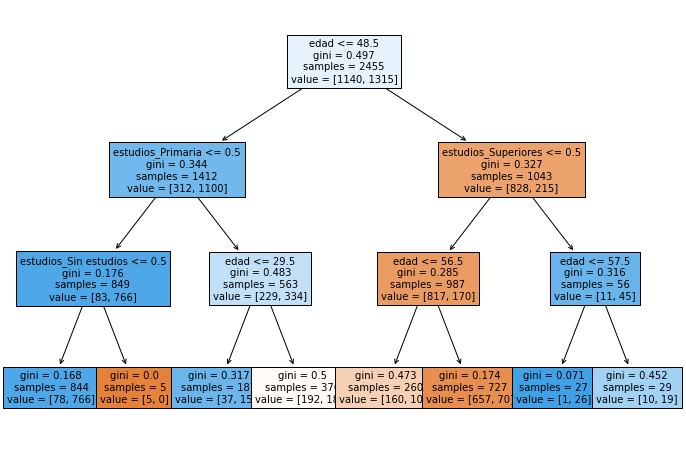

In [32]:
plt.figure(figsize=(12,8))
plot_tree(decision_tree=model, feature_names=explicativas.columns, filled=True,
          fontsize=10);

**5. Calcular predicción**

In [36]:
a = explicativas.sample()
a

,edad,sexo_Mujer,estudios_Medios universitarios,estudios_Primaria,estudios_Secundaria,estudios_Sin estudios,estudios_Superiores
1489,80,0,0,0,0,1,0


In [40]:
# probabilidad de que esa persona haya usado internet
model.predict_proba(a)

# probabilidad que NO haya usado, probabilidad que SI haya usado

array([[0.90371389, 0.09628611]])

In [41]:
# Guardo las predicciones del modelo en la variable 'y_pred'
y_pred = model.predict(explicativas)

**6. Interpretar Modelo**

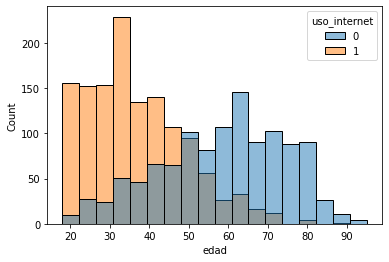

In [42]:
# Como logró ver que la edad era la variable para comenzar a partir desde ahi
# se tiene que ver con un análisis exploratorio
import seaborn as sns
sns.histplot(x = df.edad, hue=df.uso_internet)

Se puede ver que los que usan internet "1", se encuentran en su mayoria en las edades más jovenes

**7. ¿Qué tan bueno es el Modelo?**

In [43]:
df['pred'] = y_pred

In [45]:
df.sample(10)[['uso_internet', 'pred']]

,uso_internet,pred
1116,0,1
2450,1,0
2444,1,1
1616,1,1
1574,0,0
818,0,1
180,0,0
390,1,1
1476,1,1
1875,1,1


solo quiero observar la variable que me debería dar y mi predicción. Se puede ver que en algunos casos me dice que la persona usa internet cuando en realidad no es así. 

Hay que ver qué tan preciso es mi modelo de arbol

In [46]:
df['uso_internet'] == df['pred']

0        True
1       False
2        True
3       False
4        True
        ...  
2450    False
2451     True
2452     True
2453     True
2454     True
Length: 2455, dtype: bool

In [47]:
# suma todo, False = 0 y True=1
(df['uso_internet'] == df['pred']).sum()

1975

In [49]:
# nos indica qué tan bueno es el modelo
(df['uso_internet'] == df['pred']).mean()

0.8044806517311609

El arbol permite aproximar en un 80 %